In [38]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from keras import Sequential
from keras.layers import Dense, Flatten

Al igual que con MNIST, acá tienen que predecir 10 clases, que son prendas de indumentaria.

In [39]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [40]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


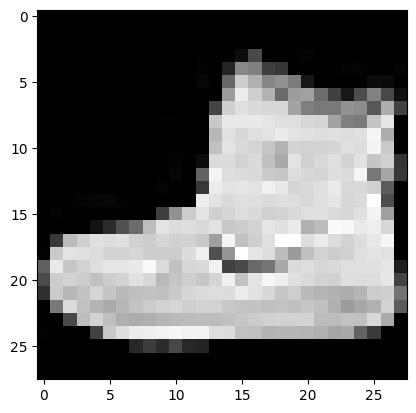

In [41]:
plt.imshow(x_train[0], cmap='gray', interpolation='none')

In [42]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [43]:
y_train[0]

9

In [44]:
model = keras.Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation="relu"), #Relu se usa para aprender patrones complejos a través de la introducción de no-linearidad
    Dense(10, activation="softmax") #Softmax se usa para clasificación multiclase
])

c:\Users\alejo\python\bootcamp-ds-mlops\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [45]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy", # usada para multi-class
    metrics=["accuracy"]
)

In [47]:
history = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7016 - loss: 5.4795 - val_accuracy: 0.7259 - val_loss: 0.9014
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7265 - loss: 0.7909 - val_accuracy: 0.7582 - val_loss: 0.7085
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7729 - loss: 0.6379 - val_accuracy: 0.7868 - val_loss: 0.6252
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7943 - loss: 0.5656 - val_accuracy: 0.8004 - val_loss: 0.5784
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8126 - loss: 0.5218 - val_accuracy: 0.8086 - val_loss: 0.5709
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8296 - loss: 0.4747 - val_accuracy: 0.8226 - val_loss: 0.5275
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8390 - loss: 0.4549 - val_accuracy: 0.8353 - val_loss: 0.4838
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8436 - loss: 0.4419 - val_accuracy: 0.

In [48]:
results = model.evaluate(x_test, y_test, batch_size=64)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8355 - loss: 0.4958


In [49]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

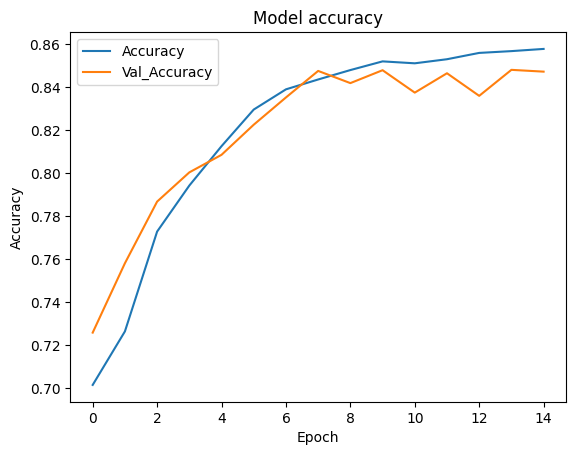

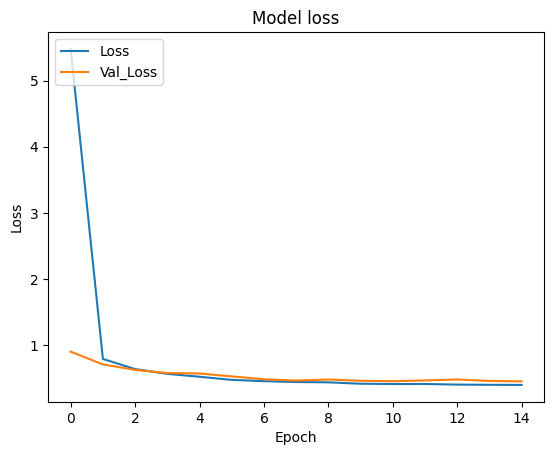

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy']) # Val_accuracy: precisión en el conjunto de datos de validación
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Val_Accuracy'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val_Loss'], loc='upper left')
plt.show()

In [51]:
pred = model.predict(x_test[:1])
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


array([[7.3938476e-21, 1.0456941e-22, 1.1705299e-26, 5.3420308e-28,
        2.2376235e-24, 1.7587630e-03, 3.6442732e-18, 3.3347346e-02,
        5.1718341e-19, 9.6489388e-01]], dtype=float32)

In [52]:
np.argmax(pred, 1)

array([9], dtype=int64)

In [53]:
y_test[:1]

array([9], dtype=uint8)

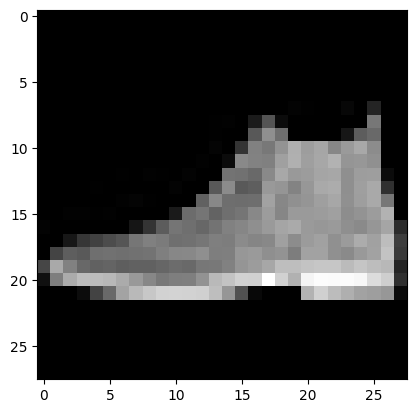

In [54]:
plt.imshow(x_test[0], cmap="gray", interpolation="none")